In [1]:
import matplotlib, sys,  os
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
sys.path.append("./mylib/")

import numpy as np
matplotlib.use('Agg')
import matplotlib.pyplot as plt

np.seterr(all="ignore")
from threeML import *
from WCDA_hal import HAL, HealpixConeROI, HealpixMapROI
import traceback
silence_warnings()
import warnings
warnings.simplefilter("ignore")
silence_warnings()
from threeML import silence_progress_bars, activate_progress_bars, toggle_progress_bars
from threeML.utils.progress_bar import trange

from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
# from astropy.visualization import astropy_mpl_style, imshAow_norm
from astropy.coordinates import Angle

import healpy as hp

from tqdm import tqdm

# from mylib import *
import mylib as my
from importlib import reload

Welcome to JupyROOT 6.24/06


21:43:16 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=920627;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=609407;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#50\50]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=515469;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=29562;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#71\71]8;;\
                  will not be available.                                                                           

21:43:17 WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=743826;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=935688;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#36\36]8;;\
                  available                                                                                        

21:43:17 INFO      Starting 3ML!                                                                     ]8;id=444813;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=335301;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#35\35]8;;\

         WARNING   WARNINGs here are NOT errors                                                      ]8;id=936645;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=491297;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#36\36]8;;\

         WARNING   but are inform you about optional packages that can be installed                  ]8;id=135900;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=879010;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#37\37]8;;\

         WARNING    to disable these messages, turn off start_warning in your config file            ]8;id=438811;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=243528;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#40\40]8;;\

         WARNING   Multinest minimizer not available                                           ]8;id=725535;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=799496;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1357\1357]8;;\

         WARNING   PyGMO is not available                                                      ]8;id=305462;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=503593;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1369\1369]8;;\

21:43:18 WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=136291;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=468824;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#94\94]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=433038;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=672909;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=690905;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=146939;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

21:43:18 WARNING   No fermitools installed                                              ]8;id=578807;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=479007;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\

Yourlib init successful!!!


In [2]:
test_source = PointSource('test_source',ra=123.22, dec=-13.56, spectral_shape=Powerlaw_flux())

my_model = Model(test_source)

In [3]:
# Get and print the differential flux at 1 keV:

differential_flux_at_1_keV = my_model.test_source(1.0)

print("Differential flux @ 1 keV : %.3f photons / ( cm2 s keV)" % differential_flux_at_1_keV)

Differential flux @ 1 keV : 1.010 photons / ( cm2 s keV)


Text(0, 0.5, 'Differential flux (ph./cm2/s/keV)')

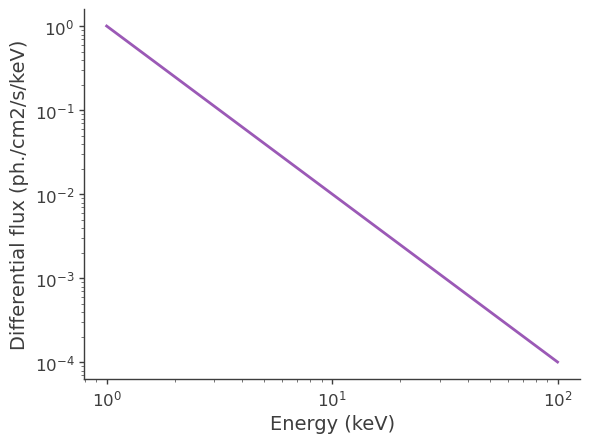

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Set up the energies

energies = np.logspace(0,2,100)

# Get the differential flux

differential_flux = my_model.test_source(energies)


fig, ax = plt.subplots()

ax.loglog(energies, differential_flux)

ax.set_xlabel("Energy (keV)")
ax.set_ylabel("Differential flux (ph./cm2/s/keV)")

21:54:32 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=943557;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=61818;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/plugins/XYLike.py#89\89]8;;\

         INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=980762;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=521965;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/plugins/XYLike.py#89\89]8;;\

         INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=537288;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=558287;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/plugins/XYLike.py#89\89]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=470851;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=599580;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=262970;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=315577;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
source.spectrum.main.Powerlaw.K,(8.7 -0.7 +0.8) x 10^-1,1 / (cm2 keV s)
source.spectrum.main.Powerlaw.index,-1.949 +/- 0.032,


Correlation matrix:

1.00,-0.88
-0.88,1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
data,25.443317
total,25.443317


Values of statistical measures:

,statistical measures
AIC,55.141954
BIC,58.710681


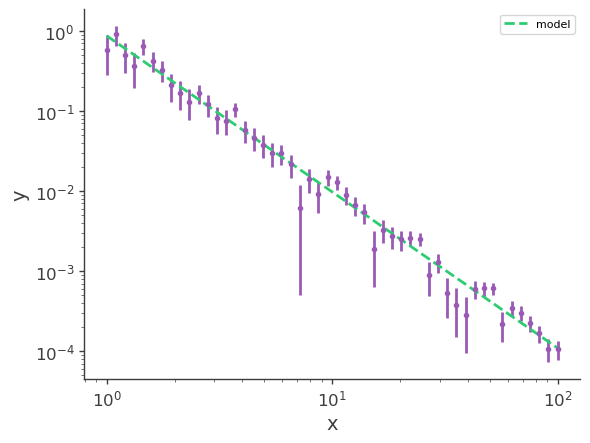

In [9]:
gen_function = Powerlaw()
x = np.logspace(0, 2, 50)

xyl_generator = XYLike.from_function(
    "sim_data", function=gen_function, x=x, yerr=0.3 * gen_function(x)
)
y = xyl_generator.y
y_err = xyl_generator.yerr

fit_function = Powerlaw()

xyl = XYLike("data", x, y, y_err)

parameters, like_values = xyl.fit(fit_function)

ig = xyl.plot(x_scale="log", y_scale="log")

In [10]:
gof, all_results, all_like_values = xyl.goodness_of_fit()

print("The null-hypothesis probability from simulations is %.2f" % gof["data"])

Goodness of fit computation:   0%|          | 0/1000 [00:00<?, ?it/s]

The null-hypothesis probability from simulations is 0.37


In [11]:
import scipy.stats

# Compute the number of degrees of freedom
n_dof = len(xyl.x) - len(fit_function.free_parameters)

# Get the observed value for chi2
# (the factor of 2 comes from the fact that the Gaussian log-likelihood is half of a chi2)
obs_chi2 = 2 * like_values["-log(likelihood)"]["data"]

theoretical_gof = scipy.stats.chi2(n_dof).sf(obs_chi2)

print("The null-hypothesis probability from theory is %.2f" % theoretical_gof)

The null-hypothesis probability from theory is 0.36


In [13]:
data_path = io.package_data.get_path_of_data_file("datasets/xy_powerlaw.txt")